# Analysis on Salt Lake City's air quality data


Fill out the following information: 

*First Name:* Luis <br>
*Last Name:* Garcia <br>
*E-mail:*  luis.garcia@utah.edu <br>
*UID:*  1269715


In [1]:
# imports and setup 

import pandas as pd
import scipy as sc
from datetime import datetime
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import pylab
import matplotlib.dates
import statsmodels.api as sm
import statsmodels.formula.api as smf

from matplotlib.pyplot import figure
%matplotlib inline
plt.rcParams['figure.figsize'] = (14, 6)
plt.style.use('ggplot')

# Steps

## Part 1: SLC Air Quality Index 

In this problem, I'll study the Air Quality at Hawthorn Elementary School in Salt Lake City. 

### Task 1.0.  Learn about AQI

Read about the [air quality index (AQI)](https://airnow.gov/index.cfm?action=aqibasics.aqi) and the 
[AirNow](https://airnow.gov/index.cfm?action=topics.about_airnow) system. 


### Task 1.1. Download data
The EPA gives access to historical air quality data at the AirData website. Read about the data available on [this information page](https://www.epa.gov/outdoor-air-quality-data/air-data-basic-information).


Go to [this website](https://www.epa.gov/outdoor-air-quality-data/download-daily-data) and download the following daily data: 
1. Pollutant = PM2.5
+ Year = 2019
+ City = Salt Lake City, UT
+ Monitor Site = 490353006 (Hawthorn Elementary School)




### Task 1.2. Import the data 
Use the pandas.read_csv() function to import the data

A word of warning: this data isn't very clean:

1. The dates are not sorted. 
+ Some dates may have missing values.
+ Some dates may have multiple values corresponding to different sensors (POC=1,2,4).   

In [2]:
air_quality_3 = pd.read_csv('ad_viz_plotval_data.csv')

In [3]:
# Creating new date column to contain proper date format

air_quality_3['Date'] = pd.to_datetime(air_quality_3['Date'])

air_quality_3['Date1'] = air_quality_3['Date'].dt.date

### Task 1.3. Plot the data

Plot the daily mean PM2.5 concentration and daily AQI value. Since there are multiple POCs for each day, plot the data in each of the following ways:
1. Average the daily mean PM2.5 concentration and daily AQI value over the POCs for each day. In a single figure, plot date vs. each of these two quantities. 
+ Make two plots, one for daily mean PM2.5 concentration and the other for daily AQI value. In the first plot, plot the daily mean PM2.5 concentration for each POC value (POC=1,2,4) seperately. In the second plot, plot the daily AQI value for each POC value (POC=1,2,4) seperately. 

*Hint*: use the pandas groupby function


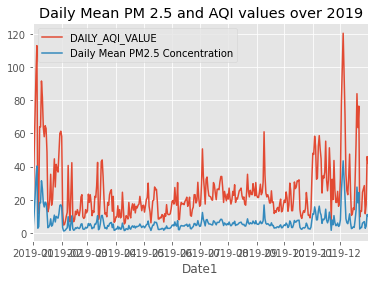

In [4]:
groupedBy = air_quality_3.groupby('Date1').mean()

groupedBy['DAILY_AQI_VALUE'].plot()
groupedBy['Daily Mean PM2.5 Concentration'].plot()

plt.title('Daily Mean PM 2.5 and AQI values over 2019')
plt.legend()
plt.show()

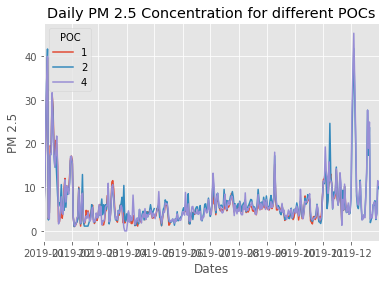

In [6]:
# your code goes here

pivotTable = pd.pivot_table(data = air_quality_3, values = 'Daily Mean PM2.5 Concentration', index = 'Date1', columns = 'POC')
pivotTable.plot()
plt.title("Daily PM 2.5 Concentration for different POCs")
plt.xlabel("Dates")
plt.ylabel("PM 2.5")
plt.show()


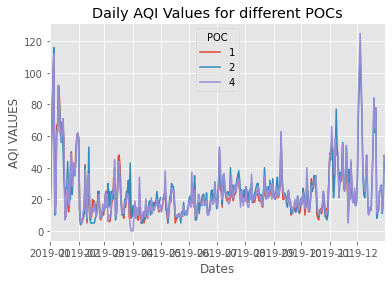

In [7]:
pivotTable2 = pd.pivot_table(data = air_quality_3, values = 'DAILY_AQI_VALUE', index = 'Date1', columns = 'POC')
pivotTable2.plot()
plt.title("Daily AQI Values for different POCs")
plt.xlabel("Dates")
plt.ylabel("AQI VALUES")
plt.show()

### Task 1.4. Plot a moving average

Make a plot with both the daily AQI value and a moving average for the daily AQI value. Use the daily AQI value that is averaged over the POC. Experiment with different time windows to find one that is reasonable.

*Hint:* Use the rolling() function as in Lecture 8. 

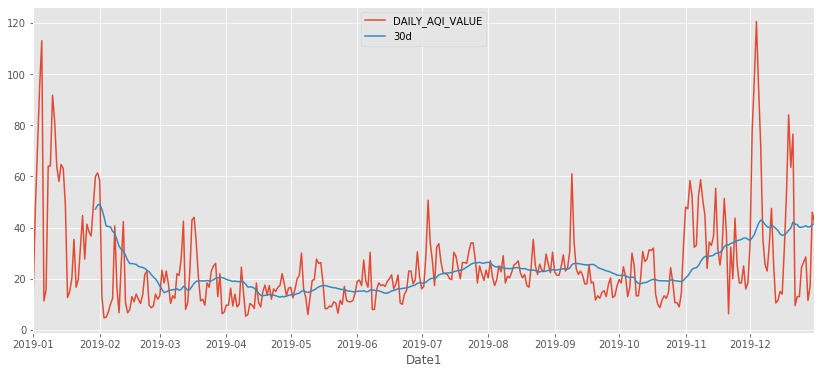

In [13]:
# your code here

groupedBy["30d"] = groupedBy[['DAILY_AQI_VALUE']].rolling(window = 30, center = False).mean()
groupedBy[['DAILY_AQI_VALUE', '30d']].plot(grid = True)